In [7]:
from IPython.core.debugger import set_trace
import numpy as np
import pandas as pd
import time
import os
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

# Reading Stock prices

In [8]:
comp_name = input("Enter the company name: ")
comp_name = comp_name.upper()
comp_name = "/content/drive/MyDrive/mini-project/data/"+ comp_name + ".csv"
df=pd.read_csv(comp_name)

Enter the company name: asianpaint


In [9]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [10]:
df = df[['Date', 'Close']].dropna()
df['Date'] = pd.to_datetime(df['Date'])
df = df.set_index('Date')
df

,Close
Date,
2000-01-03,381.65
2000-01-04,385.55
2000-01-05,383.00
2000-01-06,377.50
2000-01-07,385.70
...,...
2021-04-26,2557.90
2021-04-27,2574.35
2021-04-28,2614.55


# Using **Prophet** on Stock Prices

In [11]:
from fbprophet import Prophet


In [12]:
daily_df = df.resample('D').mean()
d_df = daily_df.reset_index().dropna()

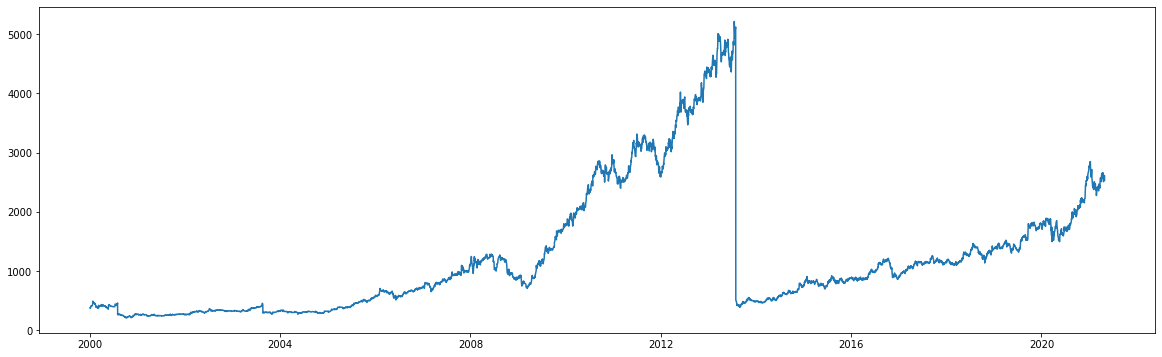

In [13]:
d_df.columns = ['ds', 'y']
fig = plt.figure(facecolor='w', figsize=(20, 6))
plt.plot(d_df.ds, d_df.y)

In [14]:
m=Prophet(interval_width=.95,daily_seasonality=False,weekly_seasonality=False,yearly_seasonality=True)
model=m.fit(d_df)

In [15]:
future=m.make_future_dataframe(periods=6,freq='M')
forecast=m.predict(future)
forecast[['ds','yhat','yhat_lower','yhat_upper','trend']].tail()

,ds,yhat,yhat_lower,yhat_upper,trend
5307,2021-06-30,2278.342160,1574.676742,2945.979819,2197.232471
5308,2021-07-31,2234.920917,1544.337432,2926.518253,2220.450455
5309,2021-08-31,2185.298216,1481.302167,2837.232029,2243.668440
5310,2021-09-30,2206.975724,1483.170892,2913.420948,2266.137457
5311,2021-10-31,2222.889279,1578.632391,2950.835339,2289.355442


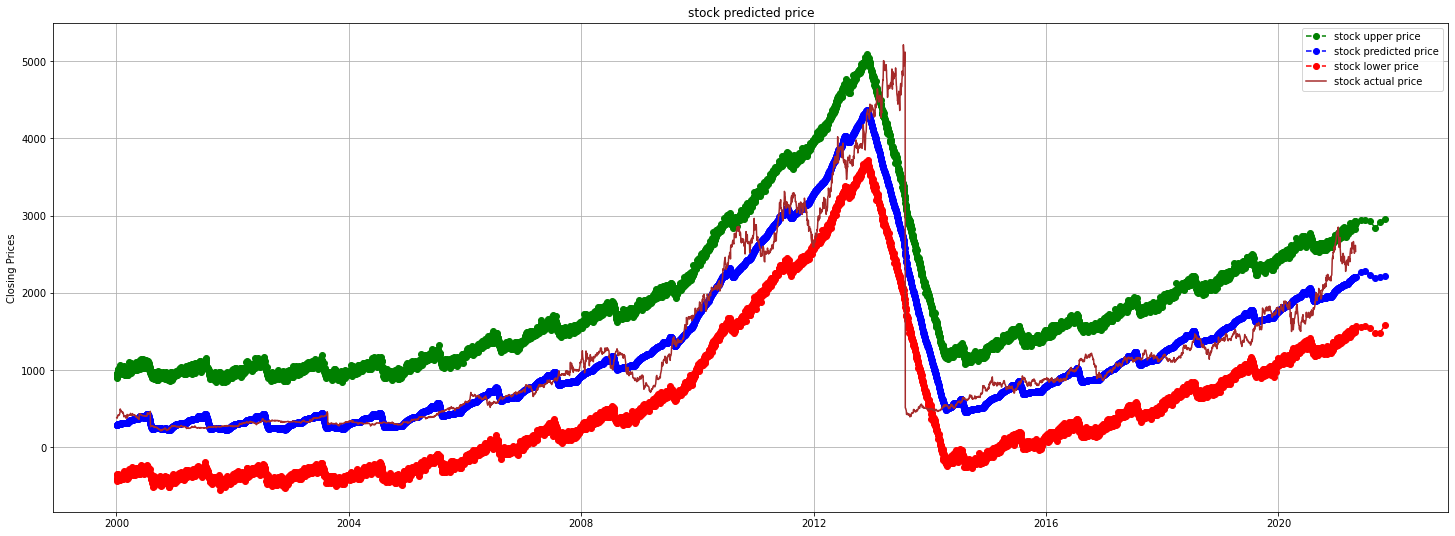

In [16]:
plt.figure(figsize=(25,9))
plt.grid(True)
plt.plot(forecast['ds'],forecast['yhat_upper'],'green',marker='o',linestyle='dashed',label='stock upper price')
plt.plot(forecast['ds'],forecast['yhat'],'blue',marker='o',linestyle='dashed',label='stock predicted price')
plt.plot(forecast['ds'],forecast['yhat_lower'],'red',marker='o',linestyle='dashed',label='stock lower price')
plt.plot(d_df.ds, d_df.y,'brown',label='stock actual price')
plt.title('stock predicted price')

plt.ylabel("Closing Prices")
plt.legend()
plt.show()

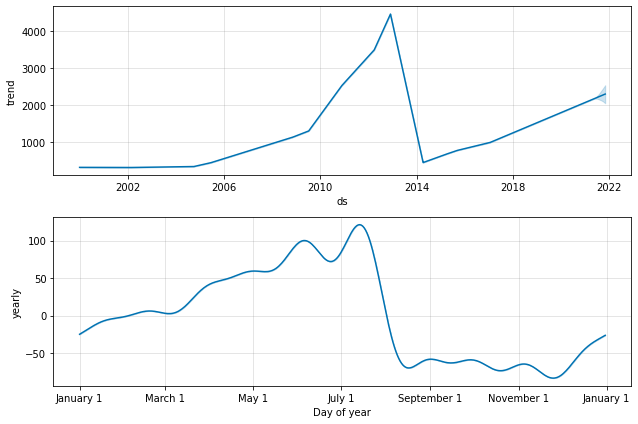

In [17]:
m.plot_components(forecast);

In [18]:
print(m.seasonalities)

OrderedDict([('yearly', {'period': 365.25, 'fourier_order': 10, 'prior_scale': 10.0, 'mode': 'additive', 'condition_name': None})])


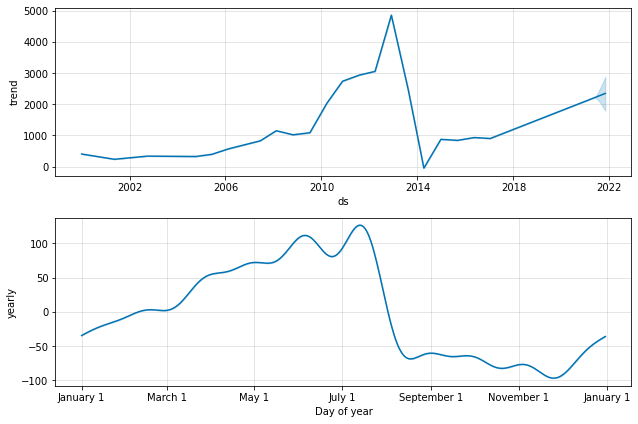

In [19]:
m1 = Prophet(interval_width=.95,daily_seasonality=False,weekly_seasonality=False,yearly_seasonality=True,changepoint_prior_scale=0.5,seasonality_prior_scale=.01)
m1.add_seasonality(name='yearly', period=180.125, fourier_order=5)
forecast1 = m1.fit(d_df).predict(m1.make_future_dataframe(periods=6,freq='M'))
fig = m1.plot_components(forecast1)

# Reading Stock Futures prices

In [20]:

ddf=pd.read_csv(comp_name)

In [21]:
ddf.tail()

,Date,Symbol,Series,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble
5301,2021-04-26,ASIANPAINT,EQ,2517.95,2530.0,2575.00,2530.00,2558.0,2557.90,2557.47,1103980,2.823400e+14,58557.0,335232.0,0.3037
5302,2021-04-27,ASIANPAINT,EQ,2557.90,2545.0,2579.90,2534.00,2571.0,2574.35,2560.55,866331,2.218288e+14,66988.0,281178.0,0.3246
5303,2021-04-28,ASIANPAINT,EQ,2574.35,2588.0,2620.25,2575.00,2612.0,2614.55,2605.91,1065561,2.776752e+14,52622.0,449241.0,0.4216
5304,2021-04-29,ASIANPAINT,EQ,2614.55,2630.0,2642.00,2570.00,2613.0,2613.45,2607.33,1295346,3.377394e+14,64039.0,447979.0,0.3458
5305,2021-04-30,ASIANPAINT,EQ,2613.45,2595.0,2605.80,2524.05,2529.0,2536.40,2558.66,1384907,3.543512e+14,91934.0,750496.0,0.5419


In [22]:
ddf = ddf[['Date', 'Last']].dropna()
ddf['Date'] = pd.to_datetime(ddf['Date'])
ddf = ddf.set_index('Date')
ddf

,Last
Date,
2000-01-03,385.0
2000-01-04,390.0
2000-01-05,383.0
2000-01-06,375.1
2000-01-07,389.0
...,...
2021-04-26,2558.0
2021-04-27,2571.0
2021-04-28,2612.0


# Using **Prophet** on stock Fut

In [23]:
forecast1[['ds','yhat','yhat_lower','yhat_upper','trend']].tail()

,ds,yhat,yhat_lower,yhat_upper,trend
5307,2021-06-30,2335.758564,1704.109605,2993.508193,2246.372341
5308,2021-07-31,2289.336346,1638.838430,2956.949112,2271.968998
5309,2021-08-31,2237.352717,1560.845439,2924.573707,2297.565656
5310,2021-09-30,2257.384997,1554.022434,2921.589820,2322.336614
5311,2021-10-31,2270.583175,1508.832985,3119.323400,2347.933272


In [24]:
ddf2=pd.DataFrame(forecast1.trend[1826:1831].copy())
ddf2.reset_index()
ddf2

,trend
1826,792.550919
1827,794.155344
1828,794.690152
1829,795.224960
1830,795.759768


In [25]:
df3 = pd.DataFrame()
df3['actual'] = ddf['Last'][:5].copy()
df3

,actual
Date,
2000-01-03,385.0
2000-01-04,390.0
2000-01-05,383.0
2000-01-06,375.1
2000-01-07,389.0


In [26]:
ddf2.index=df3.index
df3['predicted'] = ddf2['trend'].copy()
df3

,actual,predicted
Date,,
2000-01-03,385.0,792.550919
2000-01-04,390.0,794.155344
2000-01-05,383.0,794.690152
2000-01-06,375.1,795.224960
2000-01-07,389.0,795.759768
